In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.7524 - loss: 0.6749 - val_accuracy: 0.8521 - val_loss: 0.3973
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.8481 - loss: 0.4216 - val_accuracy: 0.8793 - val_loss: 0.3288
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.8716 - loss: 0.3564 - val_accuracy: 0.8895 - val_loss: 0.3067
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.8791 - loss: 0.3343 - val_accuracy: 0.8939 - val_loss: 0.2873
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.8868 - loss: 0.3110 - val_accuracy: 0.8954 - val_loss: 0.2731
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8889 - loss: 0.3009 - val_accuracy: 0.9060 - val_loss: 0.2593
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8925 - loss: 0.2894 - val_accuracy: 0.8987 - val_loss: 0.2694
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.8974 -

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9127 - loss: 0.2440
Test Accuracy: 91.35%


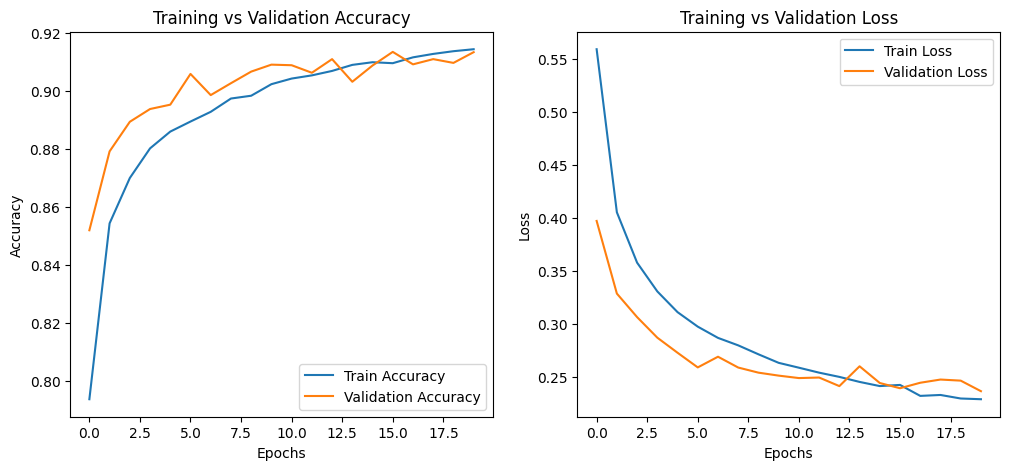

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

In [13]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(36, 36, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

In [14]:
X_train_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_train))
X_test_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test))

In [15]:
vgg_model = Sequential([
    vgg16_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [21]:
vgg_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9167 - loss: 0.2207 - val_accuracy: 0.9124 - val_loss: 0.2329
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - accuracy: 0.9161 - loss: 0.2235 - val_accuracy: 0.9113 - val_loss: 0.2455
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9183 - loss: 0.2187 - val_accuracy: 0.9135 - val_loss: 0.2339
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9213 - loss: 0.2105 - val_accuracy: 0.9105 - val_loss: 0.2474
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9189 - loss: 0.2133 - val_accuracy: 0.9154 - val_loss: 0.2364
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9147 - loss: 0.2190 - val_accuracy: 0.9146 - val_loss: 0.2439
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9204 - loss: 0.2109 - val_accuracy: 0.9140 - val_loss: 0.2390
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9210 -